In [1]:
import json
import pandas as pd

In [2]:
# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/configs.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    values = row_data[0] + list ( row_data[1].values() ) + list( row_data[2].values() )
    rows.append(values)

# # Step 3: Create a DataFrame
configs = pd.DataFrame(rows, columns=['i', 'j', 'k']+list ( row_data[1].keys() ) + list( row_data[2].keys() ))


In [3]:
configs.head()

,i,j,k,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
0,0,0,0,6,2,1,4,3,2,0.001567,...,32,64,8,128,2,0.007461,16,0.155113,0.000195,False
1,0,0,1,5,2,2,4,1,1,0.004217,...,128,8,32,8,1,0.024349,32,0.003902,0.000273,False
2,0,0,2,4,1,2,16,8,3,0.235325,...,8,64,64,32,4,0.003502,128,0.141180,0.000849,False
3,1,0,0,5,3,4,8,5,4,0.005355,...,64,128,32,64,2,0.022049,32,0.076569,0.001828,False
4,1,0,1,1,1,2,4,5,3,0.245313,...,8,256,8,128,1,0.025452,256,0.003764,0.000183,False


In [4]:
configs.shape

(91, 21)

---

In [5]:
import pandas as pd
import json

# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/results.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    
    if row_data[3] != None:
        values = row_data[0] + [round(row_data[1],2)] + \
                                list(row_data[2].values()) + \
                                 [row_data[3]['loss']] + \
                                row_data[3]['info']['test accuracy'] + \
                                row_data[3]['info']['validation accuracy'] +\
                                 row_data[3]['info']['train accuracy'] 
    # except TypeError or SyntaxError:
    #     pass
        rows.append(values)

# # Step 3: Create a DataFrame
# try:
loss_list = ['loss','gravity_loss', 'c_o_ratio_loss', 'metallicity_loss', 'temperature_loss', 'gravity_mae', 'c_o_ratio_mae', 'metallicity_mae', 'temperature_mae']


results = pd.DataFrame(rows, columns=['i', 'j', 'k', 'iteration']+
                                       list(row_data[2].keys())+['loss']+
                                       ['test_'+elem for elem in loss_list]+
                                       ['val_'+elem for elem in loss_list]+
                                       ['train_'+elem for elem in loss_list])

In [6]:
results.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,val_temperature_mae,train_loss,train_gravity_loss,train_c_o_ratio_loss,train_metallicity_loss,train_temperature_loss,train_gravity_mae,train_c_o_ratio_mae,train_metallicity_mae,train_temperature_mae
0,10,0,2,10.0,1.689444e+09,1.689444e+09,1.689480e+09,0.774481,0.781992,0.329255,...,0.143027,0.776700,0.322293,0.265152,0.169582,0.019673,0.688917,0.601616,0.475838,0.143033
1,0,0,0,10.0,1.689444e+09,1.689444e+09,1.689483e+09,0.264784,0.268992,0.106316,...,0.073621,0.263470,0.100271,0.053943,0.104349,0.004906,0.334836,0.246492,0.367766,0.070357
2,8,0,2,10.0,1.689444e+09,1.689444e+09,1.689492e+09,1.839236,1.859687,0.469297,...,0.832322,1.821479,0.462936,0.468548,0.456927,0.433067,0.863041,0.889008,0.850886,0.821347
3,8,0,1,10.0,1.689444e+09,1.689444e+09,1.689495e+09,1.313861,1.323371,0.465005,...,0.234024,1.310311,0.456048,0.377500,0.432360,0.044403,0.859178,0.766610,0.820658,0.236302
4,10,0,1,10.0,1.689444e+09,1.689444e+09,1.689496e+09,0.118278,0.122020,0.034619,...,0.104249,0.117500,0.031766,0.023114,0.053673,0.008948,0.197905,0.167203,0.262771,0.103964


In [7]:
results.shape

(42, 35)

In [8]:
# results.iloc[0]

In [9]:

# Concatenate DataFrames based on the first column (ID)
merged_df = pd.merge(results, configs, on=['i','j','k'])

# Print the concatenated DataFrame
merged_df.sort_values(by='loss', inplace=True)


In [10]:
merged_df.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
39,11,0,1,30.0,1.689444e+09,1.689444e+09,1.689681e+09,0.055335,0.054976,0.004292,...,64,128,64,256,1,0.007547,128,0.001433,0.000043,False
8,14,0,1,30.0,1.689503e+09,1.689503e+09,1.689662e+09,0.067544,0.067538,0.013916,...,128,8,16,16,4,0.182732,32,0.082767,0.000479,False
19,24,0,0,10.0,1.689495e+09,1.689495e+09,1.689571e+09,0.068614,0.068077,0.009909,...,16,16,8,128,2,0.006667,64,0.075569,0.001251,False
28,18,0,1,10.0,1.689444e+09,1.689444e+09,1.689607e+09,0.069507,0.069543,0.012189,...,256,256,256,64,1,0.015984,128,0.304900,0.000012,False
30,26,0,1,10.0,1.689525e+09,1.689525e+09,1.689612e+09,0.076368,0.076832,0.016913,...,128,64,256,128,4,0.101456,32,0.059620,0.000073,False


In [11]:
merged_df.sort_values(by='submitted').head(20)

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
1,0,0,0,10.0,1.689444e+09,1.689444e+09,1.689483e+09,0.264784,0.268992,0.106316,...,32,64,8,128,2,0.007461,16,0.155113,0.000195,False
6,0,0,1,10.0,1.689444e+09,1.689444e+09,1.689498e+09,0.155014,0.157586,0.059480,...,128,8,32,8,1,0.024349,32,0.003902,0.000273,False
26,0,0,2,10.0,1.689444e+09,1.689444e+09,1.689600e+09,0.286202,0.283402,0.128489,...,8,64,64,32,4,0.003502,128,0.141180,0.000849,False
24,1,0,1,30.0,1.689444e+09,1.689444e+09,1.689585e+09,0.241843,0.250244,0.101575,...,8,256,8,128,1,0.025452,256,0.003764,0.000183,False
22,2,0,0,10.0,1.689444e+09,1.689444e+09,1.689577e+09,1.281787,1.284994,0.459397,...,128,8,256,128,2,0.168972,16,0.005534,0.009656,False
11,3,0,1,30.0,1.689444e+09,1.689444e+09,1.689525e+09,0.639981,0.644651,0.292876,...,64,8,64,8,4,0.002604,8,0.007211,0.000017,False
31,4,0,0,10.0,1.689444e+09,1.689444e+09,1.689613e+09,1.289716,1.294648,0.456195,...,8,8,32,8,3,0.005312,128,0.001345,0.007560,False
29,4,0,1,10.0,1.689444e+09,1.689444e+09,1.689610e+09,0.588862,0.594356,0.029950,...,8,16,16,256,3,0.001927,64,0.175846,0.001916,False
17,4,0,2,10.0,1.689444e+09,1.689444e+09,1.689554e+09,0.080048,0.076922,0.012993,...,128,32,8,128,1,0.156475,256,0.052191,0.000013,False
14,6,0,0,10.0,1.689444e+09,1.689444e+09,1.689549e+09,0.093968,0.093818,0.016133,...,16,32,16,128,1,0.021490,8,0.020619,0.000033,False


In [12]:
def plot_CumulativeBudget_loss(loss_df_list,
                              print_results = True,
                              plot_results = True,
                              ):
    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                print(smallest_value)
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)



        if print_results:
            print( budget_list, list_loss_smaller)



        if plot_results:
            import seaborn as sns
            import matplotlib.pyplot as plt

            sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": "-"})
            sns.scatterplot(x=budget_list, y=list_loss_smaller, marker='s', s=50, alpha=0.9)
            plt.plot(budget_list, list_loss_smaller, '--', alpha=0.5)
            plt.xlabel('Cumulative Budget', fontsize=12)
            plt.ylabel('Validation Huber Loss', fontsize=12)

            sns.set(style="ticks")
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim((1, 10000))
            plt.ylim((0.04, .6))
            plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray')
            plt.grid(True, which='major', axis='both', linestyle='-', linewidth=1, color='darkgrey')

            # Set custom y-axis ticks
            yticks = [0.05, 0.1, 0.5, 1.]
            plt.yticks(yticks, [str(tick) for tick in yticks])
    plt.legend()

    plt.show()


0.7744809985160828
0.264783650636673
0.11827833950519562
0.11075330525636673
0.11017453670501709
0.06754410266876221
0.05533508583903313


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


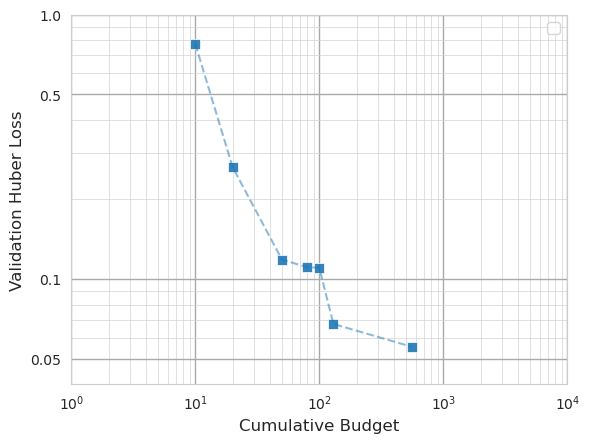

In [13]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

In [14]:
merged_df.iloc[0]

i                                          11
j                                           0
k                                           1
iteration                                30.0
submitted                     1689443983.1782
started                     1689443983.178814
finished                    1689681399.236431
loss                                 0.055335
test_loss                            0.054976
test_gravity_loss                    0.004292
test_c_o_ratio_loss                  0.009369
test_metallicity_loss                0.038106
test_temperature_loss                0.003209
test_gravity_mae                     0.070092
test_c_o_ratio_mae                   0.109811
test_metallicity_mae                 0.209035
test_temperature_mae                 0.062049
val_loss                             0.055335
val_gravity_loss                     0.004104
val_c_o_ratio_loss                   0.009012
val_metallicity_loss                 0.039216
val_temperature_loss              

In [15]:
dict(merged_df.iloc[0, 35:-1])

{'Conv__MaxPooling1D': 3,
 'Conv__NumberBlocks': 1,
 'Conv__NumberLayers': 4,
 'Conv__filters': 16,
 'Conv__kernel_size': 6,
 'FC__NumberLayers': 1,
 'FC__dropout': 0.05754920601485182,
 'FC__units': 128,
 'FC__units_c_o_ratio': 64,
 'FC__units_gravity': 128,
 'FC__units_metallicity': 64,
 'FC__units_temperature': 256,
 'FC_in_Conv__NumberLayers': 1,
 'FC_in_Conv__dropout': 0.007547405131402542,
 'FC_in_Conv__units': 128,
 'FC_out_dropout': 0.0014327274983928007,
 'lr': 4.273731496860627e-05}

In [16]:
merged_df.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout',
       'FC__units', 'FC__units_c_o_ratio', 'FC__units_gravity',
       'FC__units_metallicity', 'FC__units_tempera

In [17]:
merged_df2 = merged_df [ merged_df['loss'] < 1 ]

In [18]:
merged_df2.shape

(32, 53)

In [19]:
merged_df2.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout',
       'FC__units', 'FC__units_c_o_ratio', 'FC__units_gravity',
       'FC__units_metallicity', 'FC__units_tempera

In [20]:
data = merged_df[[
             'Conv__MaxPooling1D',
             # 'Conv__NumberBlocks',
             'Conv__NumberLayers',
             'Conv__filters',
             'Conv__kernel_size',
             'FC__NumberLayers',
             'FC__dropout',
             'FC__units',
             'FC__units_c_o_ratio',
             'FC__units_gravity',
             'FC__units_metallicity',
             'FC__units_temperature',
             # 'FC_in_Conv__dropout',
             # 'FC_in_Conv__units',
             'FC_out_dropout',
             'lr',
             'val_loss']
            ]

data.head()

,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,val_loss
39,3,4,16,6,1,0.057549,128,64,128,64,256,0.001433,0.000043,0.055335
8,2,1,16,3,4,0.005108,8,128,8,16,16,0.082767,0.000479,0.067544
19,5,2,16,8,2,0.001106,128,16,16,8,128,0.075569,0.001251,0.068614
28,2,4,16,2,4,0.012748,128,256,256,256,64,0.304900,0.000012,0.069507
30,3,2,32,3,3,0.005920,32,128,64,256,128,0.059620,0.000073,0.076368


In [21]:
dict(merged_df2.sort_values('val_loss').iloc[0, 35:-1])

{'Conv__MaxPooling1D': 3,
 'Conv__NumberBlocks': 1,
 'Conv__NumberLayers': 4,
 'Conv__filters': 16,
 'Conv__kernel_size': 6,
 'FC__NumberLayers': 1,
 'FC__dropout': 0.05754920601485182,
 'FC__units': 128,
 'FC__units_c_o_ratio': 64,
 'FC__units_gravity': 128,
 'FC__units_metallicity': 64,
 'FC__units_temperature': 256,
 'FC_in_Conv__NumberLayers': 1,
 'FC_in_Conv__dropout': 0.007547405131402542,
 'FC_in_Conv__units': 128,
 'FC_out_dropout': 0.0014327274983928007,
 'lr': 4.273731496860627e-05}

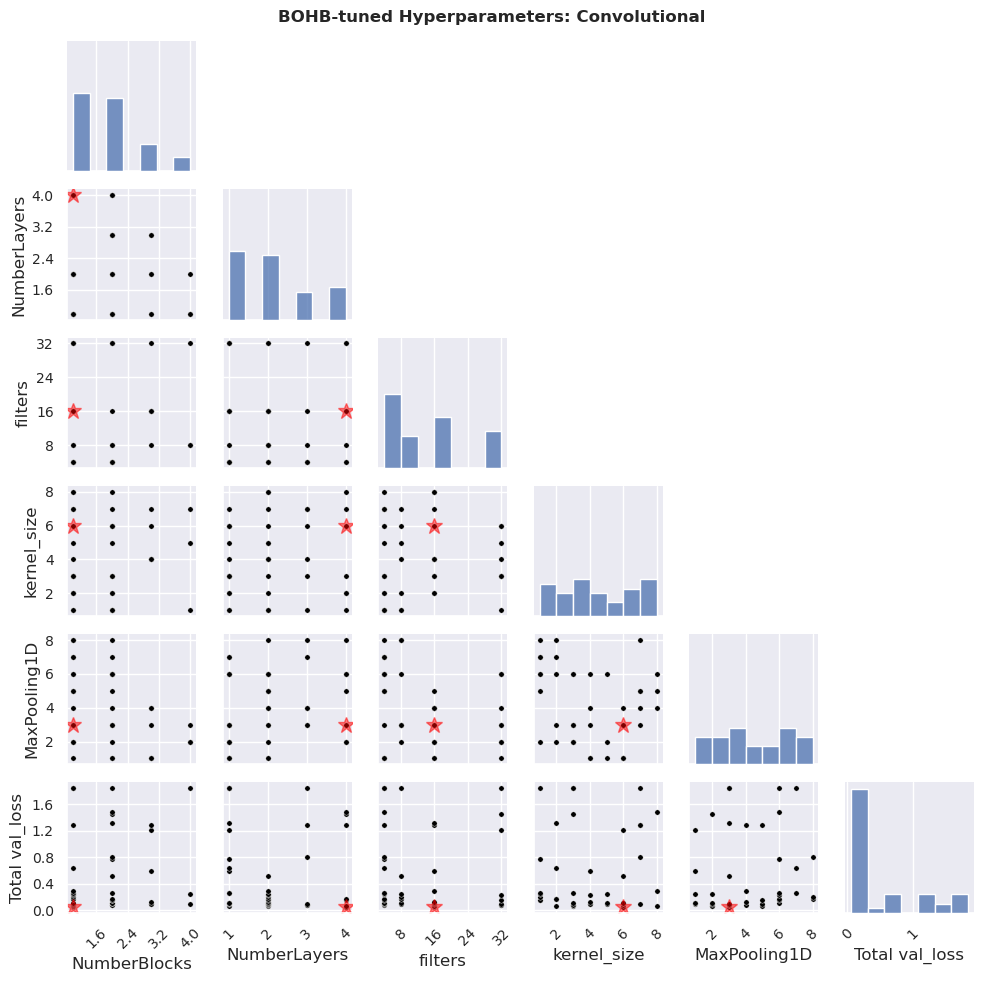

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, LogLocator

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
    'Conv__NumberBlocks',
                  'Conv__NumberLayers',
                  'Conv__filters',
                  'Conv__kernel_size',
                  'Conv__MaxPooling1D',
                  'val_loss']]

# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
labels = [
    'NumberBlocks',
          'NumberLayers',
          'filters',
          'kernel_size',
          'MaxPooling1D',
          'Total val_loss']

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=12)
    g.axes[i, 0].set_ylabel(label, fontsize=12)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in [ 'NumberLayers']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))
        # elif i == 0 and j==5:
        #     # Set logarithmic scale for the diagonal subplots
        #     g.axes[i, j].xaxis.set_major_locator(LogLocator(base=10))
        #     g.axes[i, j].xaxis.set_minor_locator(LogLocator(base=10, subs=[0.02,0.05,0.01, 0.5, 1.], numticks=10))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=12, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Convolutional", fontweight='bold', fontsize=12)

# Set the size of the figure to 10 inches by 10 inches
g.fig.set_size_inches(10, 10)

# plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


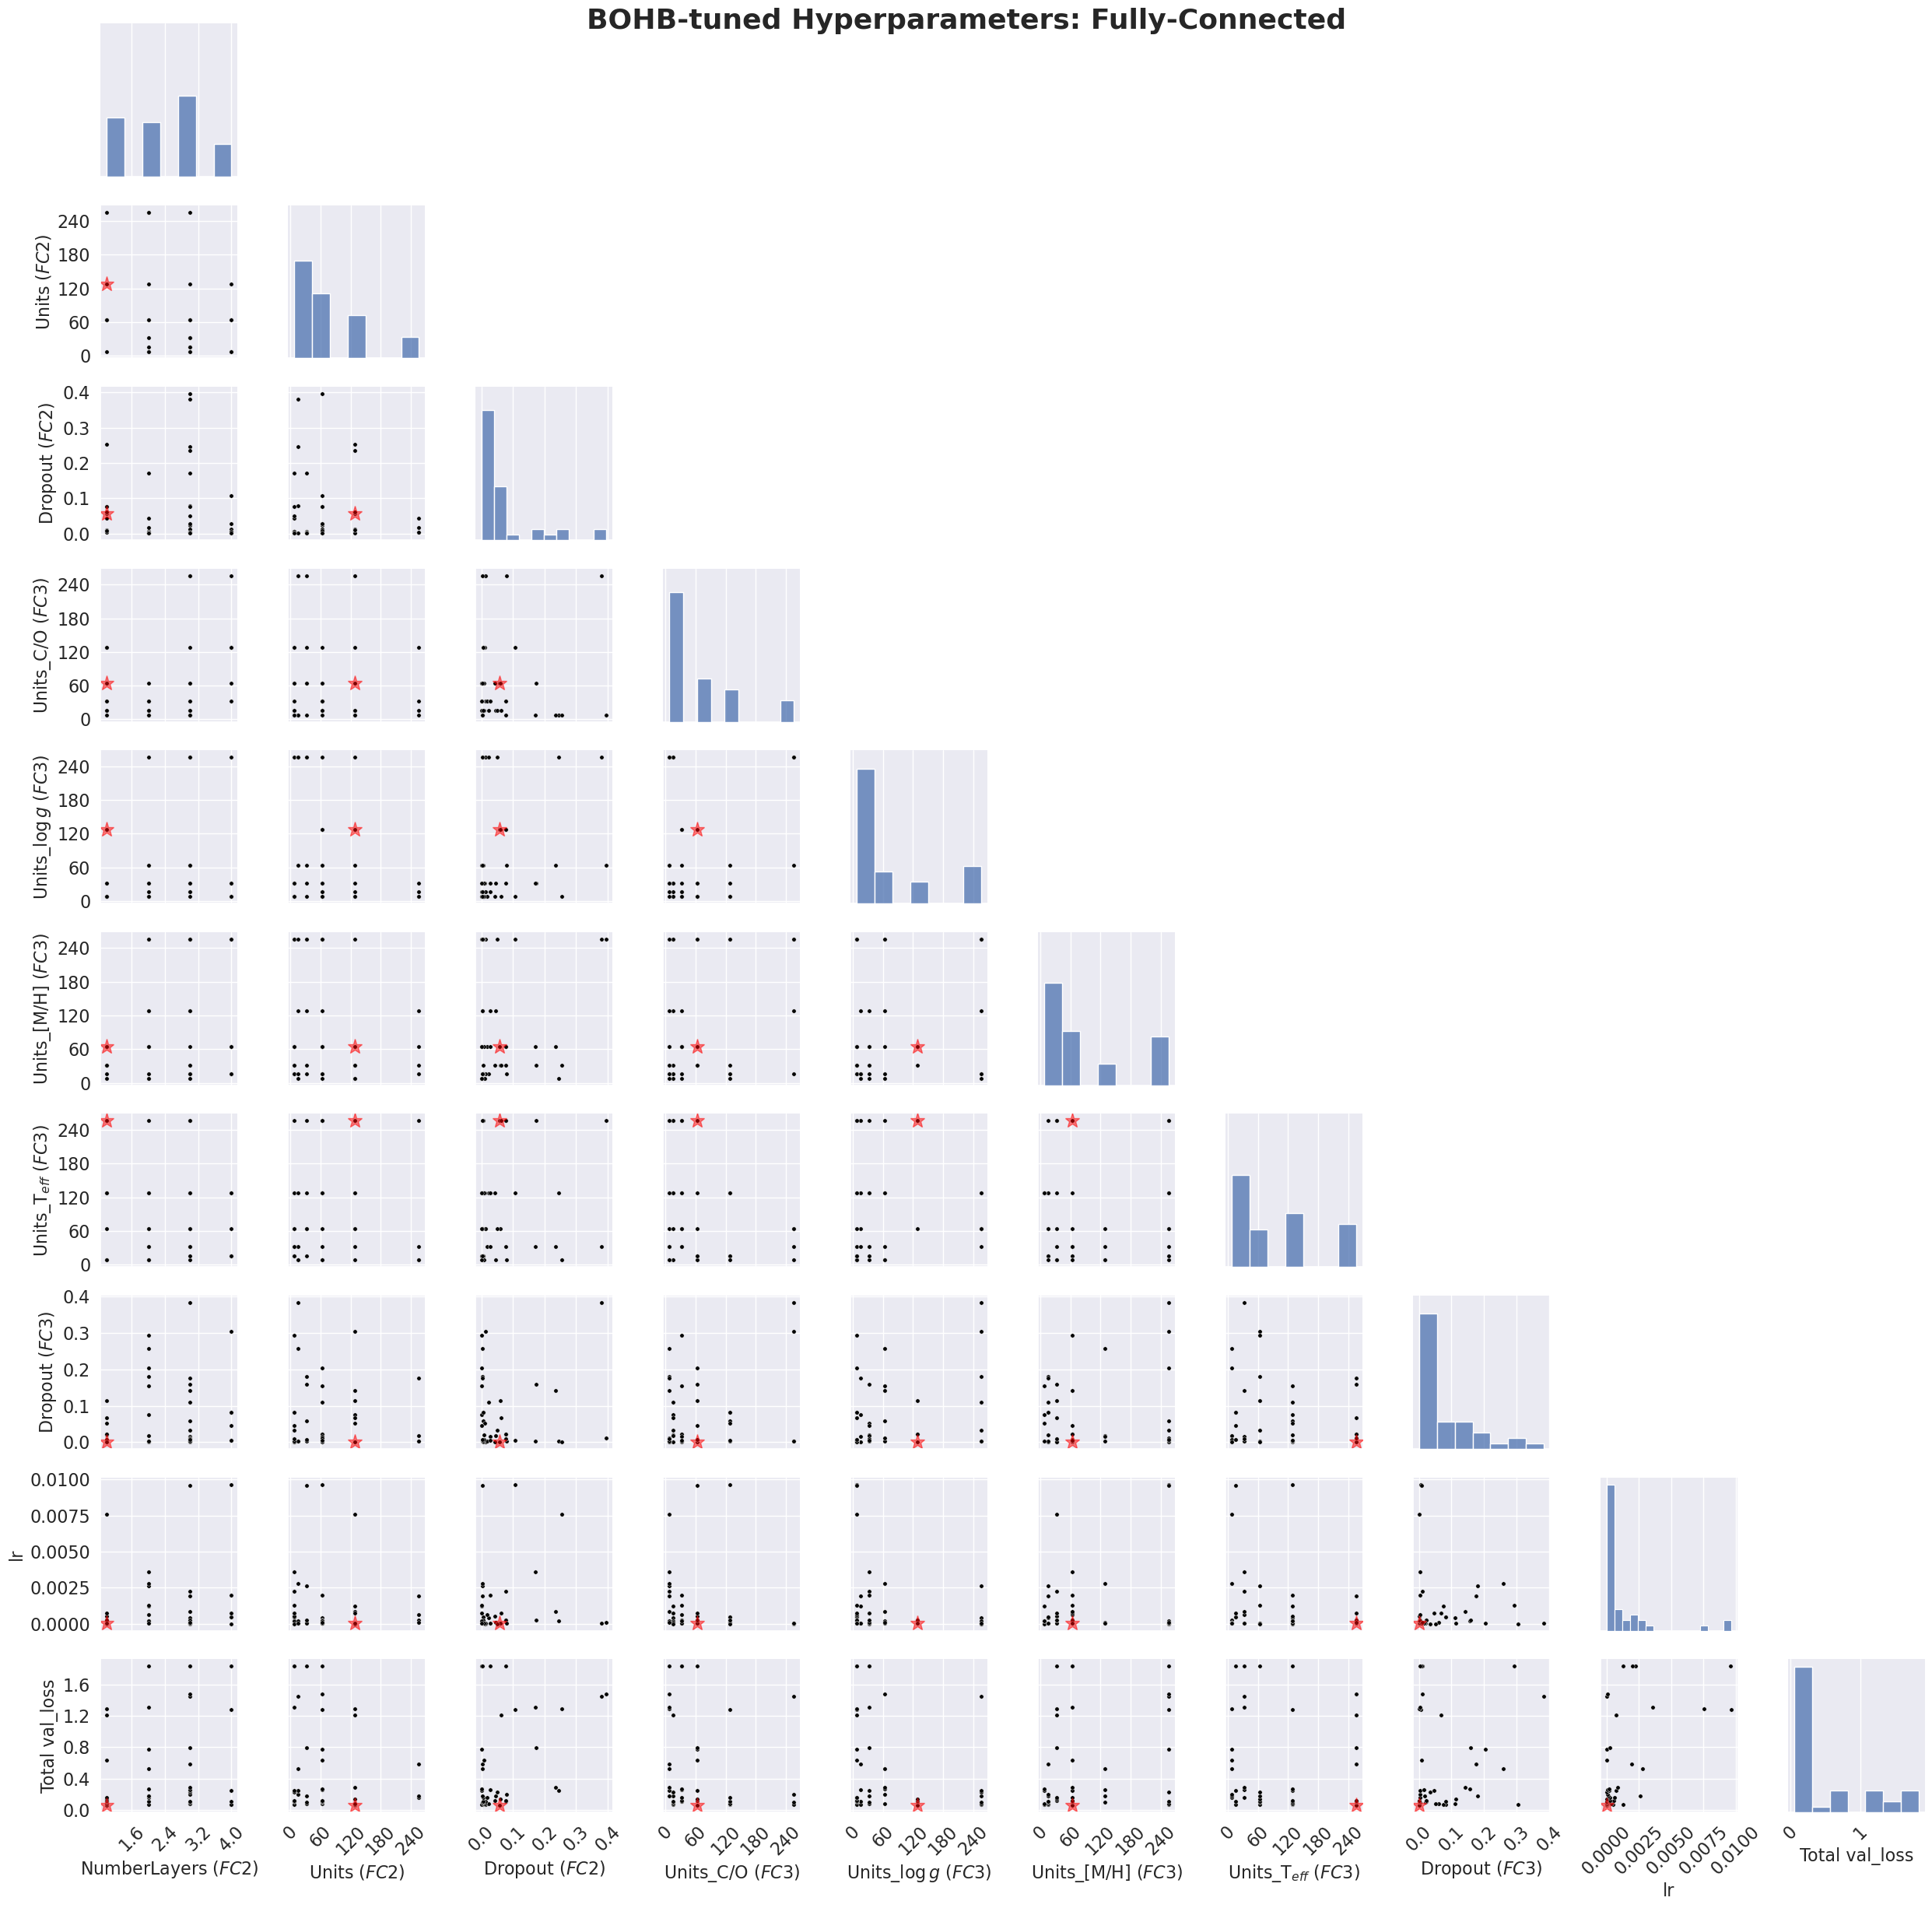

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
from matplotlib.patches import Rectangle

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
                # 'FC_in_Conv__units',
                # 'FC_in_Conv__dropout',
                ###
                'FC__NumberLayers',
                'FC__units', 
                'FC__dropout', 
                ###
                'FC__units_c_o_ratio',
                'FC__units_gravity', 
                'FC__units_metallicity', 
                'FC__units_temperature',
                'FC_out_dropout',
                # # ###
                'lr',
                # ###
                'val_loss']]

# display(data)
# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
# Customize the x-axis tick labels for each subplot
labels = [
            # # ###
            # 'Units ($FC1$)',
            # 'Dropout ($FC1$)',
            ###
            'NumberLayers ($FC2$)',
            'Units ($FC2$)', 
            'Dropout ($FC2$)', 
            ###
            'Units_C/O ($FC3$)',
            'Units_$\log g$ ($FC3$)', 
            'Units_[M/H] ($FC3$)', 
            'Units_T$_{eff}$ ($FC3$)',
            'Dropout ($FC3$)',
            # # ###
            'lr',
            # ###
            'Total val_loss'
        ]

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=16)
    g.axes[i, 0].set_ylabel(label, fontsize=16)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in ['FC__units', 'FC__units_c_o_ratio']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator([4,8,16,32,64,128,256]))
                # g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=14, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Fully-Connected", fontweight='bold', fontsize=26)

# Set the size of the figure to 10 inches by 10 inches
# g.fig.set_size_inches(14, 14)
plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()
